# b) For the same Dataset in (a) apply One-Versus-Rest SVM and classify.


### NEWS Headline Classification using Google Embedding 
- pre-trained sentence encoders by Google, ready to convert a sentence to a vector representation without any additional training, in a way that captures the semantic similarity between sentences.
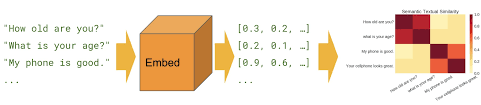

In [ ]:
!pip install tensorflow-text
# installing requried libraries

### import all the necessary libraries

In [3]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.multiclass import OneVsRestClassifier
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text

from tqdm import tqdm
import re


### import Dataset using Pandas library

In [5]:
df=pd.read_csv('/processed_data')
df.head()

,Unnamed: 0,headline,category,NEWs_length,Text_parsed
0,46889,How Do Industry Experts Evaluate Credit Card R...,2,53,industry experts evaluate credit card rewards
1,32687,Ex-49er Dana Stubblefield charged with raping ...,5,83,ex49er dana stubblefield charged raping disabl...
2,29434,Chris Hemsworth May Be The Most Swoon-Worthy H...,1,64,chris hemsworth may swoonworthy husband time
3,6093,The Insurrectionists,4,20,insurrectionists
4,40426,Harrison Ford Gives 'Star Wars' Fans The Best ...,1,59,harrison ford gives star wars fans best surpri...


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head()

,headline,category,NEWs_length,Text_parsed
0,How Do Industry Experts Evaluate Credit Card R...,2,53,industry experts evaluate credit card rewards
1,Ex-49er Dana Stubblefield charged with raping ...,5,83,ex49er dana stubblefield charged raping disabl...
2,Chris Hemsworth May Be The Most Swoon-Worthy H...,1,64,chris hemsworth may swoonworthy husband time
3,The Insurrectionists,4,20,insurrectionists
4,Harrison Ford Gives 'Star Wars' Fans The Best ...,1,59,harrison ford gives star wars fans best surpri...


### Data Cleaning

In [8]:
def clean(text):
    text = re.sub(r"http\S+", " ", text) # remove urls
    text = re.sub(r"RT ", " ", text) # remove rt
    text = re.sub(r"[^a-zA-Z\'\.\,\d\s]", " ", text) # remove special character except # @ . ,
    text = re.sub(r"[0-9]", " ", text) # remove number
    text = re.sub(r'\t', ' ', text) # remove tabs
    text = re.sub(r'\n', ' ', text) # remove line jump
    text = re.sub(r"\s+", " ", text) # remove extra white space
    text = text.strip()
    return text

In [9]:
df['Text_parsed']=df['headline'].apply(clean)

In [10]:
df.head()

,headline,category,NEWs_length,Text_parsed
0,How Do Industry Experts Evaluate Credit Card R...,2,53,How Do Industry Experts Evaluate Credit Card R...
1,Ex-49er Dana Stubblefield charged with raping ...,5,83,Ex er Dana Stubblefield charged with raping di...
2,Chris Hemsworth May Be The Most Swoon-Worthy H...,1,64,Chris Hemsworth May Be The Most Swoon Worthy H...
3,The Insurrectionists,4,20,The Insurrectionists
4,Harrison Ford Gives 'Star Wars' Fans The Best ...,1,59,Harrison Ford Gives 'Star Wars' Fans The Best ...


In [11]:
df=df[['Text_parsed','category']]
df=pd.DataFrame(df)

### Loading universal sentences encoder

In [12]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

In [13]:
train_size = int(0.7 * len(df))



In [14]:
# Split your dataset 
train = df[:train_size]
test = df[train_size:]

### Sentences embedding

In [15]:
X_train = []
for r in tqdm(train.Text_parsed.values):
  emb = use(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(review_emb)

X_train = np.array(X_train)
y_train = train.category.values

X_test = []
for r in tqdm(test.Text_parsed.values):
  emb = use(r)
  review_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(review_emb)

X_test = np.array(X_test)

100%|██████████| 18934/18934 [14:09<00:00, 22.28it/s]


###  Divide the data into training set and testing set for modelling 

In [16]:
train_arrays, test_arrays, train_labels, test_labels = train_test_split(X_train,y_train,test_size=0.05)

### SVM Classifier
- SVM classifiers do not just find a line (or in high dimensions, a hyperplane) that separates the two classes. They try to find the best line that separates them. The objective of SVM classifiers is to maximize the margin between the positive class and the negative class. This margin is defined as the distance between two Support Vectors, hence the name.

- We will use a Support Vector Machine, which is a binary classification algorithm and use it with the One-vs-Rest heuristic to perform multi-class classification.

### One-vs-Rest
- One-vs-rest (OvR for short, also referred to as One-vs-All or OvA) is a heuristic method for using binary classification algorithms for multi-class classification. It involves splitting the multi-class dataset into multiple binary classification problems.

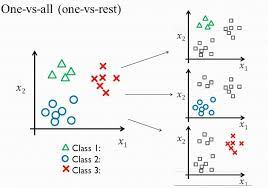

### Modelling using Support Vector Machine

In [17]:
#define model
#fit model
#use of OneVsRestClassifier for SVM

model=OneVsRestClassifier(SVC())
model.fit(train_arrays,train_labels)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

### Check overfitting and underfitting

In [18]:
model.score(train_arrays,train_labels)


# traing accuracy--> 94.71%

0.9471765546819156

In [19]:
model.score(test_arrays,test_labels)


#testing accuracy-->88.77%

0.8877320054323223

In [20]:
prediction=model.predict(test_arrays)



#### there is no overfitting and underfitting in model

### Predicted result using model

In [21]:
prediction

array([4, 1, 1, ..., 4, 1, 4])

### - check the accuracy of model 
### - classification report
### - confusion_matrix

In [22]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np


print(metrics.classification_report(test_labels,prediction))
confusion_matrix=metrics.confusion_matrix(test_labels,prediction)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.78      0.49      0.60        37
           1       0.90      0.91      0.90       492
           2       0.79      0.66      0.72       155
           3       0.82      0.80      0.81       225
           4       0.91      0.95      0.93      1145
           5       0.91      0.77      0.84       155

    accuracy                           0.89      2209
   macro avg       0.85      0.77      0.80      2209
weighted avg       0.89      0.89      0.88      2209

[[  18    1    1    3   13    1]
 [   1  448    3    4   30    6]
 [   0    8  103   15   29    0]
 [   2    8    9  181   23    2]
 [   2   17   15   17 1091    3]
 [   0   17    0    0   18  120]]


In [23]:

accuracy = accuracy_score(test_labels,prediction)
accuracy


0.8877320054323223


### SVM  Model gives 88.77% Accurate result for new training example